### 1. PParser 

In [4]:
from sonatabene.parser import PParser

parser = PParser()
image = parser.load_image("../resources/samples/harry.png")
stafflines = parser.find_staff_lines(min_contour_area=10000)

print(len(stafflines))

4


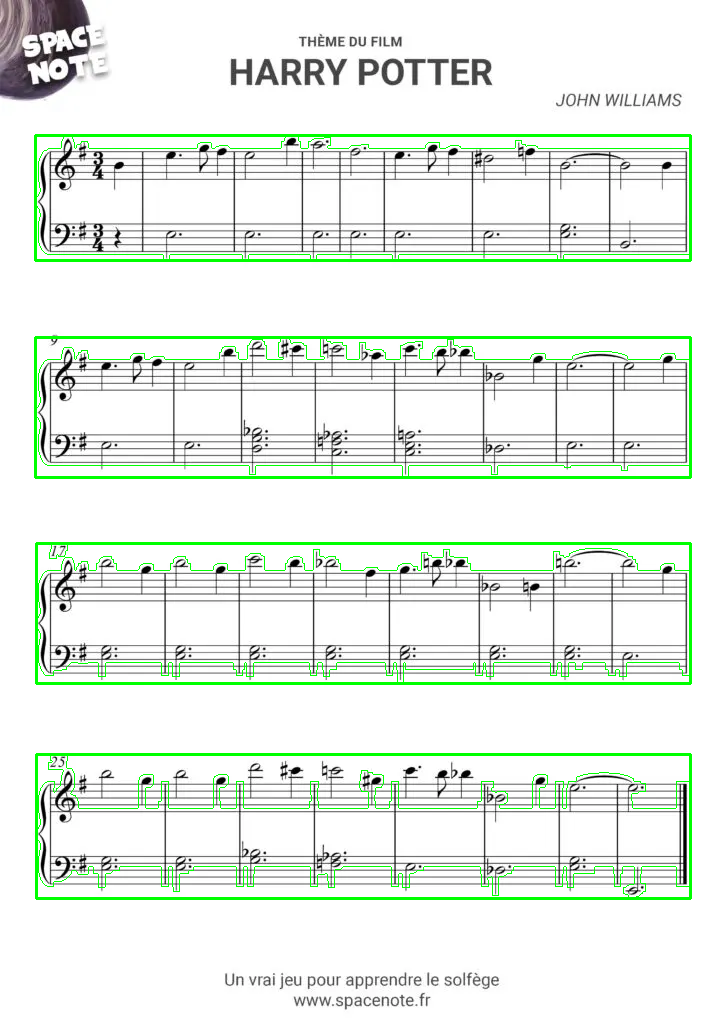

In [5]:
from PIL import Image
visualization = parser.draw_staff_lines(image, stafflines)
Image.fromarray(visualization)

### 2.YOLO-Parser

In [6]:
from ultralytics import YOLO
import cv2

model = YOLO('../models/bach.pt')

staffs = [cv2.cvtColor(staffline.image, cv2.COLOR_RGB2BGR) for staffline in stafflines]

detections = []
for staff in staffs:
    results = model.predict(
        source=staff, 
        save = False,
        project='resources/output/YOLO/tests',
        verbose=False
    )
    detections.append(results)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


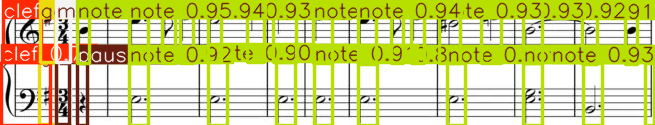

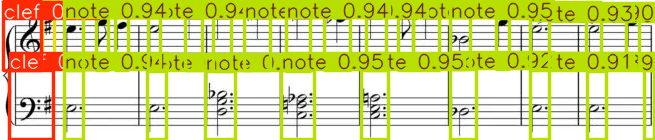

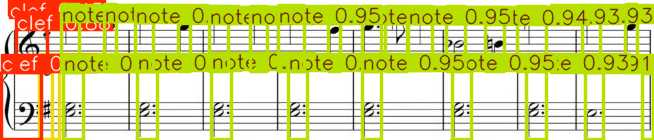

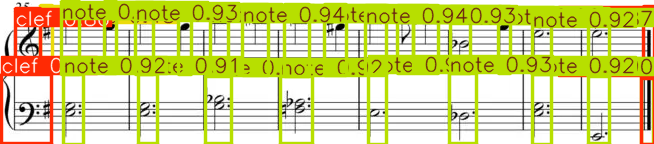

In [7]:
from PIL import Image

for i, result in enumerate(detections):
    display(Image.fromarray(result[0].plot()))



# 3. YOLO-Classification 

In [12]:
from ultralytics import YOLO
import cv2

model = YOLO('../models/chopin.pt')

staffs = [cv2.cvtColor(staffline.image, cv2.COLOR_RGB2BGR) for staffline in stafflines]
print(type(staffs[0]))
print(staffs[0].shape)

detections = []
for staff in staffs:
    results = model.predict(
        source=staff, 
        conf=0.5,
        save = False,
        project='resources/output/YOLO/tests',
        verbose=False
    )
    detections.append(results)
print(type(detections[0]))
print(detections[0])

<class 'numpy.ndarray'>
(125, 655, 3)
<class 'list'>
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'G2', 1: 'C1', 2: 'Bb', 3: '2/4', 4: 'd4', 5: 'e4', 6: 'c4', 7: 'd2', 8: 'a,2', 9: 'f4', 10: 'g2', 11: 'f2', 12: 'f1', 13: 'e1', 14: 'g1', 15: 'a1', 16: 'd1', 17: '3/8', 18: 'f,1', 19: 'b,2', 20: 'e2', 21: 'z1', 22: 'c2', 23: 'f,2', 24: 'b,1', 25: 'a,/', 26: 'Eb', 27: '4/4', 28: 'b,16', 29: 'a,8', 30: '=e,8', 31: 'f,8', 32: 'b,,8', 33: 'g,8', 34: 'e,8', 35: 'g,4', 36: 'e12', 37: '=b,4', 38: 'a,12', 39: 'g,2', 40: 'f,4', 41: 'e,4', 42: 'z8', 43: 'F', 44: 'c8', 45: 'd12', 46: 'a,4', 47: 'z4', 48: 'Ab', 49: 'd8', 50: 'c6', 51: 'd/', 52: 'e/', 53: 'f3', 54: 'A', 55: 'e3', 56: 'b,4', 57: '^d6', 58: 'F4', 59: 'c24', 60: 'd16', 61: 'e16', 62: 'f16', 63: 'z16', 64: 'f8', 65: 'G', 66: 'g,1', 67: 'd,1', 68: 'e,1', 69: 'c1', 70: 'c16', 71: '_d8', 72: '^d8', 73: '^d2', 74: 'e8', 75: 'z2', 76: 'c3', 77

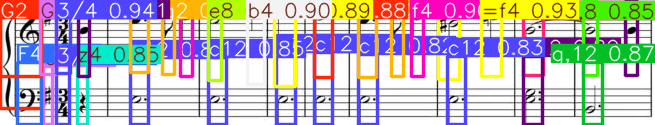

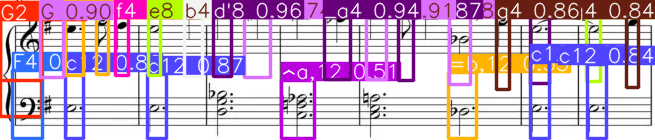

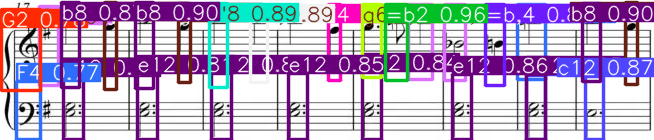

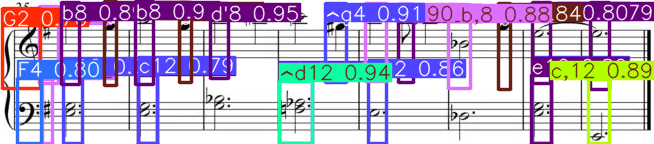

In [9]:
from PIL import Image

for i, result in enumerate(detections):
    display(Image.fromarray(result[0].plot()))